<a href="https://colab.research.google.com/github/HemanNiroula/ai-course/blob/main/worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Load dataset (make sure to upload diabetes_.csv to Colab)
data = pd.read_csv("/content/drive/MyDrive/AI_COURSE_5/diabetes_.csv")

# Display first 5 rows
data.head()
# Check data types and non-null counts
data.info()
data.describe()
data.isnull().sum()
data.shape





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(768, 9)

In [ ]:
cols_with_zero_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

data[cols_with_zero_missing] = data[cols_with_zero_missing].replace(0, np.nan)

data.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
data.fillna(data.mean(), inplace=True)

data.isnull().sum()


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['Outcome']).values
y = data['Outcome'].values

X[:5], y[:5]


(array([[6.00000000e+00, 1.48000000e+02, 7.20000000e+01, 3.50000000e+01,
         1.55548223e+02, 3.36000000e+01, 6.27000000e-01, 5.00000000e+01],
        [1.00000000e+00, 8.50000000e+01, 6.60000000e+01, 2.90000000e+01,
         1.55548223e+02, 2.66000000e+01, 3.51000000e-01, 3.10000000e+01],
        [8.00000000e+00, 1.83000000e+02, 6.40000000e+01, 2.91534196e+01,
         1.55548223e+02, 2.33000000e+01, 6.72000000e-01, 3.20000000e+01],
        [1.00000000e+00, 8.90000000e+01, 6.60000000e+01, 2.30000000e+01,
         9.40000000e+01, 2.81000000e+01, 1.67000000e-01, 2.10000000e+01],
        [0.00000000e+00, 1.37000000e+02, 4.00000000e+01, 3.50000000e+01,
         1.68000000e+02, 4.31000000e+01, 2.28800000e+00, 3.30000000e+01]]),
 array([1, 0, 1, 0, 1]))

In [ ]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)

    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

# Use the function
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

# Show shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((538, 8), (230, 8), (538,), (230,))

In [ ]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions.")

    return np.sqrt(np.sum((point1 - point2) ** 2))


In [ ]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = [euclidean_distance(query, x) for x in X_train]

    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]

    nearest_labels = y_train[nearest_indices]

    prediction = np.bincount(nearest_labels).argmax()

    return prediction


In [ ]:
def knn_predict(X_test, X_train, y_train, k=3):
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)


In [ ]:
def compute_accuracy(y_true, y_pred):
    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    return (correct / total) * 100


In [ ]:
predictions = knn_predict(X_test, X_train, y_train, k=3)
accuracy = compute_accuracy(y_test, predictions)

accuracy


np.float64(70.0)

TASK 2

In [ ]:
# Min-Max Scaling
X_min = X.min(axis=0)
X_max = X.max(axis=0)

X_scaled = (X - X_min) / (X_max - X_min)

X_scaled[:5]


array([[0.35294118, 0.67096774, 0.48979592, 0.30434783, 0.17013008,
        0.31492843, 0.23441503, 0.48333333],
       [0.05882353, 0.26451613, 0.42857143, 0.23913043, 0.17013008,
        0.17177914, 0.11656704, 0.16666667],
       [0.47058824, 0.89677419, 0.40816327, 0.24079804, 0.17013008,
        0.10429448, 0.25362938, 0.18333333],
       [0.05882353, 0.29032258, 0.42857143, 0.17391304, 0.09615385,
        0.20245399, 0.03800171, 0.        ],
       [0.        , 0.6       , 0.16326531, 0.30434783, 0.18509615,
        0.50920245, 0.94363792, 0.2       ]])

In [ ]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(X_scaled, y)


In [ ]:
predictions_scaled = knn_predict(X_test_s, X_train_s, y_train_s, k=3)
accuracy_scaled = compute_accuracy(y_test_s, predictions_scaled)

accuracy_scaled


np.float64(71.30434782608695)

In [ ]:
import time

k_values = range(1, 16)

accuracy_original = []
accuracy_scaled = []

time_original = []
time_scaled = []

for k in k_values:
    # --- Original Data ---
    start = time.time()
    preds = knn_predict(X_test, X_train, y_train, k)
    end = time.time()

    accuracy_original.append(compute_accuracy(y_test, preds))
    time_original.append(end - start)

    # --- Scaled Data ---
    start = time.time()
    preds_s = knn_predict(X_test_s, X_train_s, y_train_s, k)
    end = time.time()

    accuracy_scaled.append(compute_accuracy(y_test_s, preds_s))
    time_scaled.append(end - start)


PLOT1

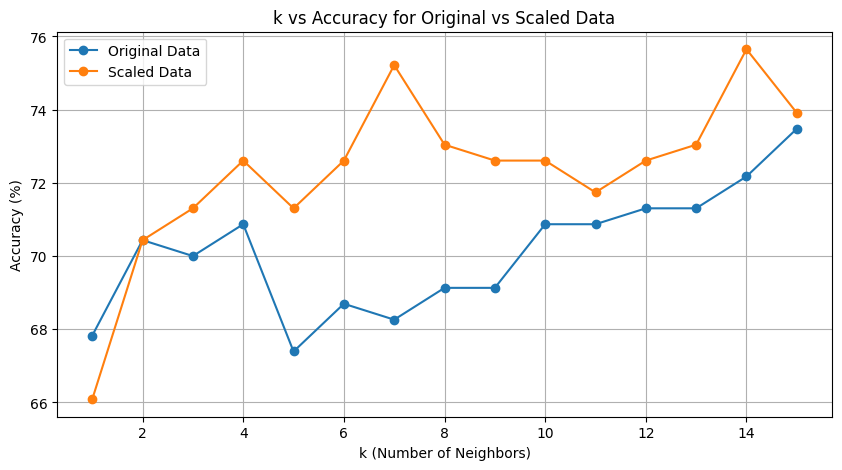

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(k_values, accuracy_original, marker='o', label='Original Data')
plt.plot(k_values, accuracy_scaled, marker='o', label='Scaled Data')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy for Original vs Scaled Data')
plt.legend()
plt.grid(True)
plt.show()


PLOT 2: